# The Business Problem

Pawdacity is a leading pet store chain in Wyoming with 13 stores throughout the state. This year, Pawdacity would like to expand and open a 14th store. Your manager has asked you to perform an analysis to recommend the city for Pawdacity’s newest store, based on predicted yearly sales.

Your first step in predicting yearly sales is to first format and blend together data from different datasets and deal with outliers.

Your manager has given you the following information to work with:

1. The monthly sales data for all of the Pawdacity stores for the year 2010.
2. NAICS data on the most current sales of all competitor stores where total sales is equal to 12 months of sales.
3. A partially parsed data file that can be used for population numbers.
4. Demographic data (Households with individuals under 18, Land Area, Population Density, and Total Families) for each city and county in the state of Wyoming. For people who are unfamiliar with the US city system, a state contains counties and counties contains one or more cities.


## Map of Wyoming Counties


![Wyoming](https://www.digital-topo-maps.com/county-map/wyoming-county-map.gif "Map of Wyoming Counties")


## Steps to Success

### Step 1: Business and Data Understanding
Your project should include a description of the key business decisions that need to be made.

### Step 2: Building the Training Set
To properly build the model, and select predictor variables, create a dataset with the following columns:

```code
City
2010 Census Population
Total Pawdacity Sales
Households with Under 18
Land Area
Population Density
Total Families
```

This dataset will be your training set to help you build a regression model in order to predict sales in the Practice Project in the next lesson. Every row should have sales data because we're trying to predict sales.

`Notes`: You should be consolidating the data at the city level and **not at the store level**. We only have data at the city wide level so any analysis at the store level will not be sufficient to complete this analysis.

We simply need to focus on cleaning up and blending the data together in this step.

If you’ve done everything correctly, the sum for each of the above columns should be:

* Census Population: 213,862
* Total Pawdacity Sales: 3,773,304
* Households with Under 18: 34,064
* Land Area: 33,071
* Population Density: 63
* Total Families: 62,653
* with 11 rows of data

### Step 3: Dealing with Outliers

Once you have created the dataset, look for outliers and figure out how deal with your outliers. Use the IQR method to determine if there are outlier cities for each of the variables and then justify which city that has at least one outlier value should be removed.

**IQR Steps**

To calculate the upper fence and the lower fence, here are the exact steps:

1. Calculate 1st quartile Q1 and 3rd quartile Q3 of the dataset. You can use the Excel function QUARTILE.INC or QUARTILE.EXC
2. Calculate the Interquartile Range: IQR = Q3 - Q1
3. Add 1.5 IQR to Q3 to get the upper fence: Upper Fence = Q3 + 1.5 IQR
4. Subtract 1.5 IQR to Q1 to get the lower fence: Lower Fence = Q1 - 1.5 IQR
5. Values above the Upper Fence and values below the Lower Fence are outliers

# Data

`p2-2010-pawdacity-monthly-sales.csv` - This file contains all of the monthly sales for all Pawdacity stores for 2010.

`p2-partially-parsed-wy-web-scrape.csv` - This is a partially parsed data file that can be used for population numbers.

`p2-wy-453910-naics-data.csv` - NAICS data on the sales of all competitor stores where total sales is equal to 12 months of sales

`p2-wy-demographic-data.csv` - This file contains demographic data for each city and county in Wyoming.

---

In [1]:
# for seaborn distplot
def _revrt(X,m=None):
    """
    Inverse of forrt. Equivalent to Munro (1976) REVRT routine.
    """
    if m is None:
        m = len(X)
    i = int(m // 2+1)
    y = X[:i] + np.r_[0,X[i:],0]*1j
    return np.fft.irfft(y)*m

from statsmodels.nonparametric import kdetools

# replace the implementation with new method.
kdetools.revrt = _revrt

# import seaborn AFTER replacing the method. 
import seaborn as sns
sns.set()

In [2]:
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 200

import numpy as np
import matplotlib.pyplot as plt

In [3]:
import missingno as msno

---

# Monthly Sales

`p2-2010-pawdacity-monthly-sales.csv` - This file contains all of the monthly sales for all Pawdacity stores for 2010.

In [4]:
monthly_sales = pd.read_csv('p2-2010-pawdacity-monthly-sales.csv')

In [5]:
monthly_sales.shape

(11, 17)

In [6]:
monthly_sales

,NAME,ADDRESS,CITY,STATE,ZIP,January,February,March,April,May,June,July,August,September,October,November,December
0,Pawdacity,509 Fort St # A,Buffalo,WY,82834,16200,13392,14688,17064,18360,14040,12960,19224,15984,13392,13176,16848
1,Pawdacity,601 SE Wyoming Blvd Unit 252,Casper,WY,82609,29160,21600,27000,27648,29160,27216,25488,25704,22896,25272,28944,27648
2,Pawdacity,3769 E Lincolnway,Cheyenne,WY,82001,79920,70632,79056,77544,73656,77976,73872,77544,78516,74520,74736,79920
3,Pawdacity,2625 Big Horn Ave,Cody,WY,82414,19440,15984,19008,18144,16632,17496,18792,20304,19224,18144,18576,16632
4,Pawdacity,123 S 2nd St,Douglas,WY,82633,16200,13392,14688,17064,18360,14040,12960,19224,15984,29808,17496,18792
5,Pawdacity,932 Main St,Evanston,WY,82930,24840,21168,21600,22248,24192,24624,25488,25704,22032,21168,25920,24840
6,Pawdacity,200 E Lakeway Rd,Gillette,WY,82718,47520,41796,48384,47088,42336,41904,42120,47088,49032,48168,42984,44712
7,Pawdacity,180 S Bent St,Powell,WY,82435,20520,17928,20304,21168,21600,17928,18144,18576,20304,21168,17496,18792
8,Pawdacity,512 E Main St,Riverton,WY,82501,27000,22032,28512,26784,25920,24192,25056,22896,25488,26352,26784,22248
9,Pawdacity,2706 Commercial Way,Rock Springs,WY,82901,21600,19872,22248,20952,17496,24840,22464,21816,21384,20304,22032,18576


In [7]:
monthly_sales.ZIP = monthly_sales.ZIP.astype('category')

In [8]:
monthly_sales.describe(include='all')

,NAME,ADDRESS,CITY,STATE,ZIP,January,February,March,April,May,June,July,August,September,October,November,December
count,11,11,11,11,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
unique,1,11,11,1,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Pawdacity,932 Main St,Cheyenne,WY,82930.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11,1,1,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,29945.454545,25831.636364,29415.272727,28885.090909,28080.000000,28512.000000,27569.454545,28944.000000,29503.636364,29277.818182,28472.727273,28590.545455
std,NaN,NaN,NaN,NaN,NaN,18700.479333,16795.081228,18894.461734,18202.557455,16802.245564,18242.731374,17297.884381,18014.710789,18811.034247,17456.853175,17281.570838,18795.295009
min,NaN,NaN,NaN,NaN,NaN,16200.000000,13392.000000,14688.000000,17064.000000,16632.000000,14040.000000,12960.000000,18576.000000,15984.000000,13392.000000,13176.000000,16632.000000
25%,NaN,NaN,NaN,NaN,NaN,19980.000000,16956.000000,19656.000000,19548.000000,18360.000000,17712.000000,18468.000000,19764.000000,19764.000000,20736.000000,18036.000000,18684.000000
50%,NaN,NaN,NaN,NaN,NaN,24840.000000,21168.000000,22248.000000,22032.000000,21600.000000,24624.000000,25056.000000,21816.000000,22032.000000,23760.000000,25056.000000,22248.000000
75%,NaN,NaN,NaN,NaN,NaN,28080.000000,24192.000000,28296.000000,27216.000000,27540.000000,28296.000000,25704.000000,25704.000000,29592.000000,28080.000000,27864.000000,26568.000000


`Name` takes only Pawdacity, and `State` only takes WY for Wyoming.

`Address`, `City`, and `ZIP` all take a unique value for the 11 entries, so it seems that each store is represented individually.

There are no missing values, so this dataset is good to go.

---

# Population

`p2-partially-parsed-wy-web-scrape.csv` - This is a partially parsed data file that can be used for population numbers.

In [9]:
population = pd.read_csv('p2-partially-parsed-wy-web-scrape.csv')

In [10]:
population.shape

(103, 4)

In [11]:
population.head()

,City|County,2014 Estimate,2010 Census,2000 Census
0,Afton|Lincoln,"<td>1,968</td>","<td>1,911</td>","<td>1,818</td>"
1,Albin|Laramie,<td>185</td>,<td>181</td>,<td>120</td>
2,Alpine|Lincoln,<td>845</td>,<td>828</td>,<td>550</td>
3,Baggs|Carbon,<td>439</td>,<td>440</td>,<td>348</td>
4,Bairoil|Sweetwater,<td>107</td>,<td>106</td>,<td>97</td>


In [12]:
population.tail()

,City|County,2014 Estimate,2010 Census,2000 Census
98,Yoder|Goshen,<td>161</td>,<td>151</td>,<td>169</td>
99,NaN,"<td colspan=""2""></td>","<td class=""navbox-abovebelow"" colspan=""2"">","<td colspan=""2""></td>"
100,NaN,"<td class=""navbox-list navbox-even hlist"" styl...","<td colspan=""2""></td>","<td class=""navbox-list navbox-odd hlist"" style..."
101,NaN,"<td colspan=""2""></td>","<td class=""navbox-list navbox-odd hlist"" style...","<td style=""padding:2px"">"
102,NaN,"<td colspan=""2""></td>","<td class=""navbox-list navbox-even hlist"" styl...","<td colspan=""2""></td>"


The last four rows seem to be not consisting of informative data, possibly a result from web scraping. Let's drop them.

In [13]:
population = population.iloc[:-4, :]

It also seems there are a bunch of special characters in this dataset, including HTML tags. Let's see which:

In [14]:
population['City|County'].value_counts().head()

Wamsutter|Sweetwater      1
Cokeville|Lincoln         1
Rolling Hills|Converse    1
Dixon|Carbon              1
Hudson|Fremont            1
Name: City|County, dtype: int64

`City|County` has unique values for each entry. We should split this column into two columns.

In [15]:
population['City'], population['County'] = population['City|County'].str.split('|', 1).str

In [16]:
population = population.drop('City|County', axis=1)

In [17]:
population['City'].value_counts().head()

Wamsutter      1
Pinedale ?     1
La Barge       1
Newcastle ?    1
Meeteetse      1
Name: City, dtype: int64

Awesome. Still unique values for each entry, but now we have some question marks. Let's strip these too.

In [18]:
population['City'] = population['City'].str.replace('?', '').str.strip()

In [19]:
population

,2014 Estimate,2010 Census,2000 Census,City,County
0,"<td>1,968</td>","<td>1,911</td>","<td>1,818</td>",Afton,Lincoln
1,<td>185</td>,<td>181</td>,<td>120</td>,Albin,Laramie
2,<td>845</td>,<td>828</td>,<td>550</td>,Alpine,Lincoln
3,<td>439</td>,<td>440</td>,<td>348</td>,Baggs,Carbon
4,<td>107</td>,<td>106</td>,<td>97</td>,Bairoil,Sweetwater
5,"<td>2,735</td>","<td>2,213</td>",<td>936</td>,Bar Nunn,Natrona
6,"<td>1,312</td>","<td>1,285<sup id=""cite_ref-4"" class=""reference...","<td>1,238</td>",Basin,Big Horn
7,<td>521</td>,<td>518</td>,<td>-</td>,Bear River,Uinta
8,<td>538</td>,<td>552</td>,<td>408</td>,Big Piney,Sublette
9,"<td>4,615</td>","<td>4,585</td>","<td>3,900</td>",Buffalo,Johnson


We should get rid of the HTML tags.

In [20]:
from bs4 import BeautifulSoup

In [21]:
for col in ['2014 Estimate', '2010 Census', '2000 Census']:
    population[col] = [BeautifulSoup(X).getText() for X in population[col]]

In [22]:
population.head(10)

,2014 Estimate,2010 Census,2000 Census,City,County
0,"1,968","1,911","1,818",Afton,Lincoln
1,185,181,120,Albin,Laramie
2,845,828,550,Alpine,Lincoln
3,439,440,348,Baggs,Carbon
4,107,106,97,Bairoil,Sweetwater
5,"2,735","2,213",936,Bar Nunn,Natrona
6,"1,312","1,285[4]","1,238",Basin,Big Horn
7,521,518,-,Bear River,Uinta
8,538,552,408,Big Piney,Sublette
9,"4,615","4,585","3,900",Buffalo,Johnson


Some [square brackets] are still in the data. Let's get rid of these too.

In [23]:
population['2010 Census'] = population['2010 Census'].str.replace(r"\[.*\]","")

And let's get rid of that dash (-).

In [24]:
population['2000 Census'] = population['2000 Census'].str.replace('-', '')

In [25]:
population

,2014 Estimate,2010 Census,2000 Census,City,County
0,"1,968","1,911","1,818",Afton,Lincoln
1,185,181,120,Albin,Laramie
2,845,828,550,Alpine,Lincoln
3,439,440,348,Baggs,Carbon
4,107,106,97,Bairoil,Sweetwater
5,"2,735","2,213",936,Bar Nunn,Natrona
6,"1,312","1,285","1,238",Basin,Big Horn
7,521,518,,Bear River,Uinta
8,538,552,408,Big Piney,Sublette
9,"4,615","4,585","3,900",Buffalo,Johnson


Convert to proper NaN value:

In [26]:
for col in ['2014 Estimate', '2010 Census', '2000 Census']:
    population[col] = [x.replace(',', '') for x in population[col]]
    
population['2000 Census'] = population['2000 Census'].replace('', np.nan, regex=True)

In [27]:
for col in ['2014 Estimate', '2010 Census', '2000 Census']:
    population[col] = pd.to_numeric(population[col], errors='coerce')

In [28]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
2014 Estimate    99 non-null int64
2010 Census      99 non-null int64
2000 Census      98 non-null float64
City             99 non-null object
County           99 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 3.9+ KB


Clean! It would be interesting to check why Bear River, Uinta had a value of "-" for the 2000 Census. We removed it and assumed it was NaN data. Let's move on to the next.

---

# Competitors

`p2-wy-453910-naics-data.csv` - NAICS data on the sales of all competitor stores where total sales is equal to 12 months of sales

In [29]:
competitors = pd.read_csv('p2-wy-453910-naics-data.csv')

In [30]:
competitors.shape

(32, 4)

In [31]:
competitors

,BUSINESS NAME,PHYSICAL CITY NAME,SALES VOLUME,CASS_LastLine
0,Mile High Mobile Pet LLC,Cheyenne,300000,"Cheyenne, WY 82007-3528"
1,Pets City Inc,Cheyenne,640000,"Cheyenne, WY 82009-4851"
2,Petco Animal Sups Stores Inc,Cheyenne,0,"Cheyenne, WY 82009-4945"
3,Pet-A-Care,Cheyenne,81000,"Cheyenne, WY 82009-1009"
4,Muddy Paws Pet Salon,Laramie,76000,"Laramie, WY 82070-8979"
5,Prossers Feed and Seed L L C,Wheatland,77000,"Wheatland, WY 82201-2901"
6,Pet Pals Inc of Goshen County,Torrington,126991,"Torrington, WY 82240-3516"
7,Don Bruner Sales LLC,Torrington,750000,"Torrington, WY 82240-3516"
8,Pals For Pets Inc,Saratoga,83000,"Saratoga, WY 82331"
9,Pet Barn,Worland,69000,"Worland, WY 82401-2715"


Interesting. `SALES_VOLUME` is 0 for four stores. We need to check if that is an actual zero, or if it represents missing values.

---

# Demographics

`p2-wy-demographic-data.csv` - This file contains demographic data for each city and county in Wyoming.

In [32]:
demographics = pd.read_csv('p2-wy-demographic-data.csv')

In [33]:
demographics.shape

(99, 6)

In [34]:
demographics

,City,County,Land Area,Households with Under 18,Population Density,Total Families
0,Laramie,Albany,2513.745235,2075,5.19,4668.93
1,Rock River,Albany,200.444000,165,0.41,372.30
2,Basin,Big Horn,543.951304,250,0.66,566.43
3,Burlington,Big Horn,137.646214,63,0.17,143.34
4,Byron,Big Horn,252.489592,116,0.31,262.93
5,Cowley,Big Horn,297.680668,137,0.36,309.98
6,Deaver,Big Horn,76.285854,35,0.09,79.44
7,Greybull,Big Horn,691.226120,318,0.84,719.80
8,Lovell,Big Horn,809.453936,372,0.98,842.91
9,Manderson,Big Horn,48.507853,22,0.06,50.51


This dataset looks clean. Phew!

# Build the dataset

To properly build the model, and select predictor variables, create a dataset with the following columns:

```code
City
2010 Census Population
Total Pawdacity Sales
Households with Under 18
Land Area
Population Density
Total Families
```

This dataset will be your training set to help you build a regression model in order to predict sales in the Practice Project in the next lesson. Every row should have sales data because we're trying to predict sales.

`Notes`: You should be consolidating the data at the city level and **not at the store level**. We only have data at the city wide level so any analysis at the store level will not be sufficient to complete this analysis.

All four datasets have `City`, so the analysis will be on the city-level.

* 2010 Census Population - comes from `population`
* Total Pawdacity Sales - comes from `monthly_sales`
* Households with Under 18 - comes from `demographics`
* Land Area - comes from `demographics`
* Population Density - comes from `demographics`
* Total Families - comes from `demographics`

First, let's aggregate the monthly sales from Pawdacity.

In [35]:
temp = monthly_sales

In [36]:
temp['SALES VOLUME'] = temp.loc[:,'January':'December'].sum(axis = 1)

In [37]:
temp.head()

,NAME,ADDRESS,CITY,STATE,ZIP,January,February,March,April,May,June,July,August,September,October,November,December,SALES VOLUME
0,Pawdacity,509 Fort St # A,Buffalo,WY,82834,16200,13392,14688,17064,18360,14040,12960,19224,15984,13392,13176,16848,185328
1,Pawdacity,601 SE Wyoming Blvd Unit 252,Casper,WY,82609,29160,21600,27000,27648,29160,27216,25488,25704,22896,25272,28944,27648,317736
2,Pawdacity,3769 E Lincolnway,Cheyenne,WY,82001,79920,70632,79056,77544,73656,77976,73872,77544,78516,74520,74736,79920,917892
3,Pawdacity,2625 Big Horn Ave,Cody,WY,82414,19440,15984,19008,18144,16632,17496,18792,20304,19224,18144,18576,16632,218376
4,Pawdacity,123 S 2nd St,Douglas,WY,82633,16200,13392,14688,17064,18360,14040,12960,19224,15984,29808,17496,18792,208008


In [38]:
temp['SALES VOLUME'].sum()

3773304

In [39]:
temp['SALES VOLUME'].mean()

343027.63636363635

Let's create our dataset now! Yay!

In [40]:
data = temp[['CITY', 'NAME', 'SALES VOLUME']]

In [41]:
data

,CITY,NAME,SALES VOLUME
0,Buffalo,Pawdacity,185328
1,Casper,Pawdacity,317736
2,Cheyenne,Pawdacity,917892
3,Cody,Pawdacity,218376
4,Douglas,Pawdacity,208008
5,Evanston,Pawdacity,283824
6,Gillette,Pawdacity,543132
7,Powell,Pawdacity,233928
8,Riverton,Pawdacity,303264
9,Rock Springs,Pawdacity,253584


In [42]:
data = pd.merge(data,
                demographics[['City', 'Land Area', 'Households with Under 18', 'Population Density', 'Total Families']],
                left_on='CITY',
                right_on='City',
                how='left')

In [43]:
data = data.drop('City', axis=1)

In [44]:
data

,CITY,NAME,SALES VOLUME,Land Area,Households with Under 18,Population Density,Total Families
0,Buffalo,Pawdacity,185328,3115.507500,746,1.55,1819.50
1,Casper,Pawdacity,317736,3894.309100,7788,11.16,8756.32
2,Cheyenne,Pawdacity,917892,1500.178400,7158,20.34,14612.64
3,Cody,Pawdacity,218376,2998.956960,1403,1.82,3515.62
4,Douglas,Pawdacity,208008,1829.465100,832,1.46,1744.08
5,Evanston,Pawdacity,283824,999.497100,1486,4.95,2712.64
6,Gillette,Pawdacity,543132,2748.852900,4052,5.80,7189.43
7,Powell,Pawdacity,233928,2673.574550,1251,1.62,3134.18
8,Riverton,Pawdacity,303264,4796.859815,2680,2.34,5556.49
9,Rock Springs,Pawdacity,253584,6620.201916,4022,2.78,7572.18


In [45]:
data = pd.merge(data,
                population[['City', '2010 Census']],
                left_on='CITY',
                right_on='City',
                how='left')

In [47]:
data = data.drop('City', axis=1)

In [50]:
data

,CITY,NAME,SALES VOLUME,Land Area,Households with Under 18,Population Density,Total Families,2010 Census
0,Buffalo,Pawdacity,185328,3115.507500,746,1.55,1819.50,4585
1,Casper,Pawdacity,317736,3894.309100,7788,11.16,8756.32,35316
2,Cheyenne,Pawdacity,917892,1500.178400,7158,20.34,14612.64,59466
3,Cody,Pawdacity,218376,2998.956960,1403,1.82,3515.62,9520
4,Douglas,Pawdacity,208008,1829.465100,832,1.46,1744.08,6120
5,Evanston,Pawdacity,283824,999.497100,1486,4.95,2712.64,12359
6,Gillette,Pawdacity,543132,2748.852900,4052,5.80,7189.43,29087
7,Powell,Pawdacity,233928,2673.574550,1251,1.62,3134.18,6314
8,Riverton,Pawdacity,303264,4796.859815,2680,2.34,5556.49,10615
9,Rock Springs,Pawdacity,253584,6620.201916,4022,2.78,7572.18,23036


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 8 columns):
CITY                        11 non-null object
NAME                        11 non-null object
SALES VOLUME                11 non-null int64
Land Area                   11 non-null float64
Households with Under 18    11 non-null int64
Population Density          11 non-null float64
Total Families              11 non-null float64
2010 Census                 11 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 792.0+ bytes


# How should we add the competitors dataset?

# Outliers

Once you have created the dataset, look for outliers and figure out how deal with your outliers.

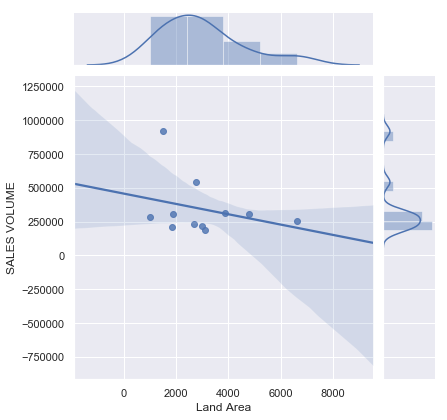

In [67]:
sns.jointplot(y="SALES VOLUME", x="Land Area", data=data, kind="reg")
plt.show()

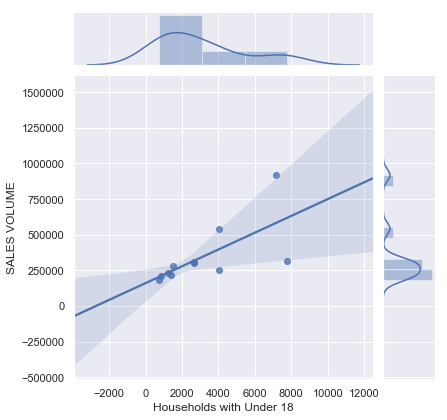

In [68]:
sns.jointplot(y="SALES VOLUME", x="Households with Under 18", data=data, kind="reg")
plt.show()

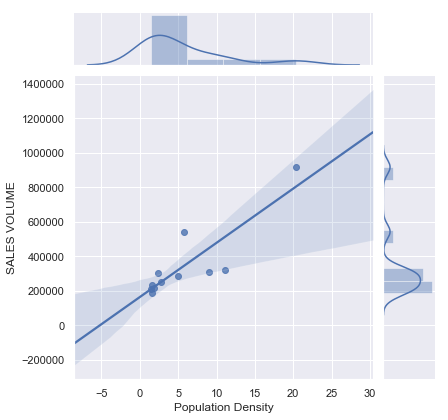

In [69]:
sns.jointplot(y="SALES VOLUME", x="Population Density", data=data, kind="reg")
plt.show()

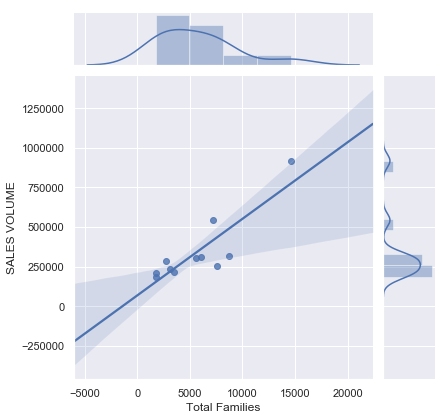

In [70]:
sns.jointplot(y="SALES VOLUME", x="Total Families", data=data, kind="reg")
plt.show()

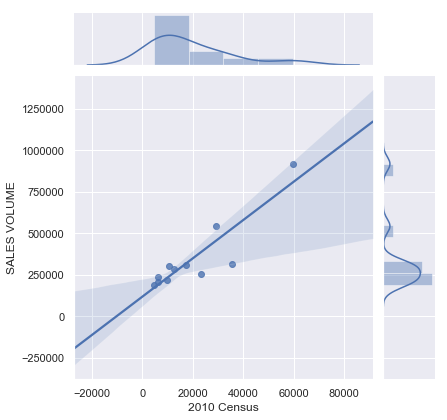

In [71]:
sns.jointplot(y="SALES VOLUME", x="2010 Census", data=data, kind="reg")
plt.show()

Use the IQR method to determine if there are outlier cities for each of the variables and then justify which city that has at least one outlier value should be removed.

**IQR Steps**

To calculate the upper fence and the lower fence, here are the exact steps:

1. Calculate 1st quartile Q1 and 3rd quartile Q3 of the dataset. You can use the Excel function QUARTILE.INC or QUARTILE.EXC
2. Calculate the Interquartile Range: IQR = Q3 - Q1
3. Add 1.5 IQR to Q3 to get the upper fence: Upper Fence = Q3 + 1.5 IQR
4. Subtract 1.5 IQR to Q1 to get the lower fence: Lower Fence = Q1 - 1.5 IQR
5. Values above the Upper Fence and values below the Lower Fence are outliers

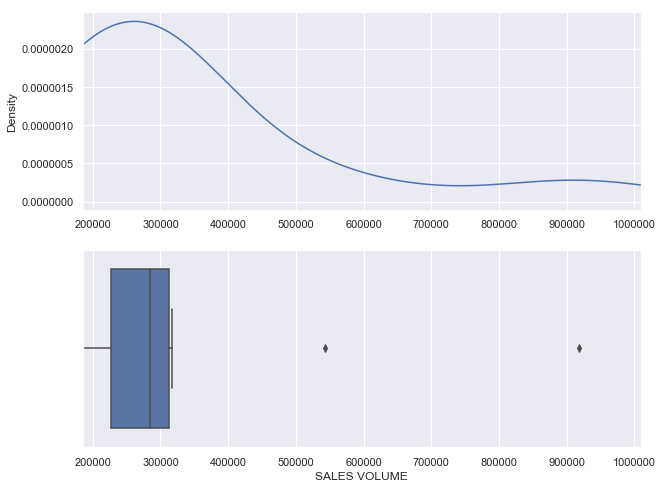

In [85]:
col = 'SALES VOLUME'
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data[col].min(), data[col].max()*1.1)
 
ax = data[col].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data[col].min(), data[col].max()*1.1)
sns.boxplot(x=data[col])
plt.show()

There are two outliers here: Gillette (542132) and Cheyenne (917892).

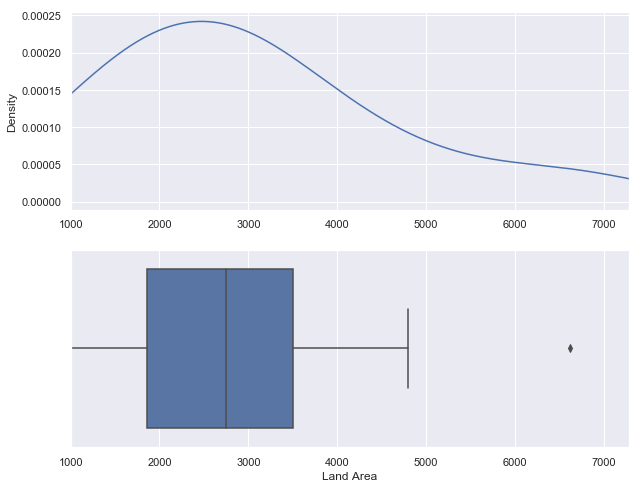

In [90]:
col = 'Land Area'
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data[col].min(), data[col].max()*1.1)
 
ax = data[col].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data[col].min(), data[col].max()*1.1)
sns.boxplot(x=data[col])
plt.show()

There is one outlier here: Rock Springs (6620).

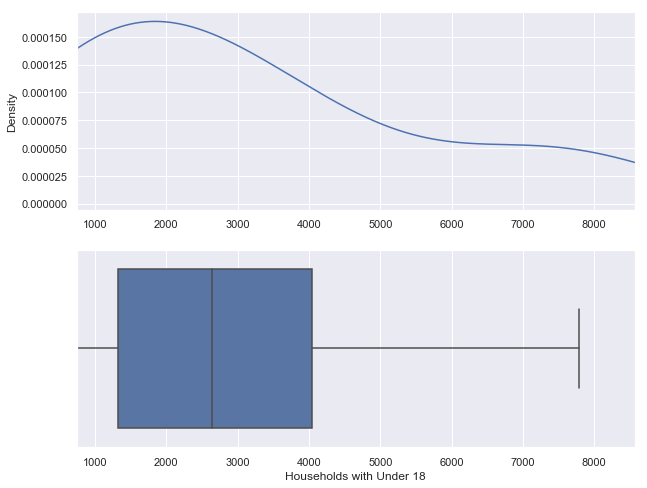

In [93]:
col = 'Households with Under 18'
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data[col].min(), data[col].max()*1.1)
 
ax = data[col].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data[col].min(), data[col].max()*1.1)
sns.boxplot(x=data[col])
plt.show()

No outlier.

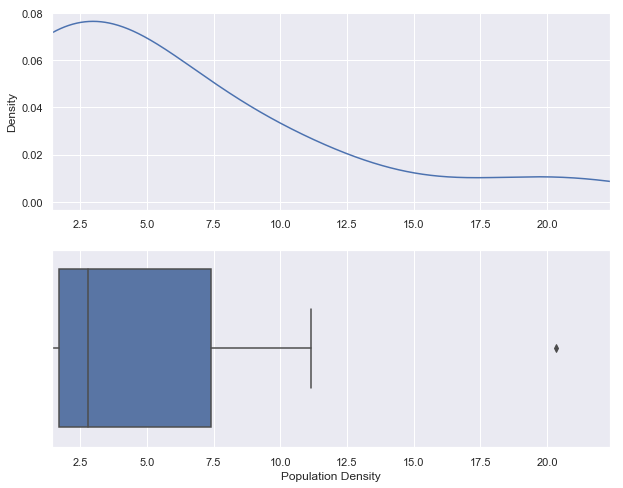

In [99]:
col = 'Population Density'
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data[col].min(), data[col].max()*1.1)
 
ax = data[col].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data[col].min(), data[col].max()*1.1)
sns.boxplot(x=data[col])
plt.show()

There seems to be one outlier: Cheyenne (20.34)

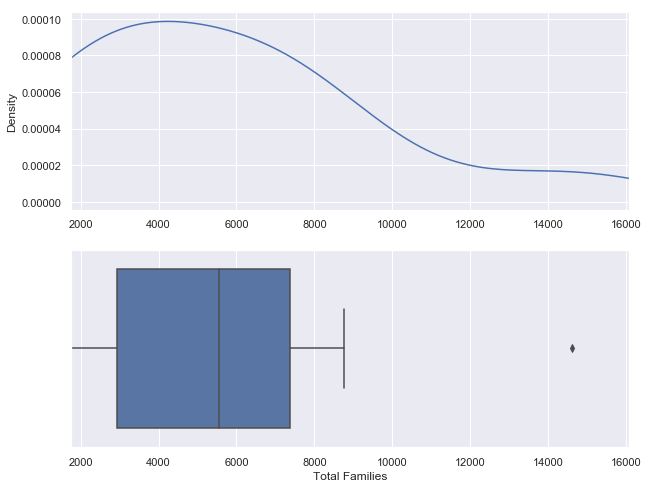

In [94]:
col = 'Total Families'
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data[col].min(), data[col].max()*1.1)
 
ax = data[col].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data[col].min(), data[col].max()*1.1)
sns.boxplot(x=data[col])
plt.show()

There is one outlier: Cheyenne (14613).

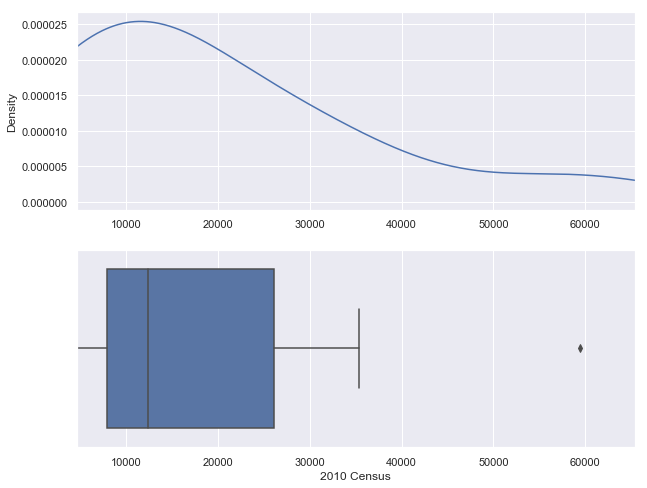

In [96]:
col = '2010 Census'
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data[col].min(), data[col].max()*1.1)
 
ax = data[col].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data[col].min(), data[col].max()*1.1)
sns.boxplot(x=data[col])
plt.show()

There is one outlier: Cheyenne (59466).